In [1]:
##1. 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##데이터
from sklearn.preprocessing import StandardScaler

##모델
from sklearn.cluster import KMeans


from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


%matplotlib inline

In [2]:
##엑셀불러오기
df_raw=pd.read_excel('220620_subway2.xlsx')
# df_raw=pd.read_excel('220620_subway3.xlsx')
# df_raw=pd.read_excel('220620_subway4.xlsx')
df_raw

,호선,역명,길이(M),층규모,면적(㎡),준공년도,섬식,상대식,복합식,지상,지상+지하(복합),지하,환승유무,사용인원(22.05)_승하차/평균,임대상가면적
0,3,가락시장,205,4,16066.0,2010,0,1,0,0,0,1,1,8201.290320,21.00
1,8,가락시장,125,2,7728.1,1996,0,1,0,0,0,1,1,7367.338710,160.05
2,7,가산디지털단지,165,4,12551.5,2000,0,1,0,0,0,1,1,36395.758060,212.48
3,2,강남,205,2,6392.0,1982,0,1,0,0,0,1,1,75795.661290,183.22
4,7,강남구청,165,3,10359.3,2001,0,1,0,0,0,1,1,14980.532260,1320.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,3,홍제,205,3,9825.0,1985,1,0,0,0,0,1,0,16670.725810,1440.96
287,5,화곡,165,2,9127.7,1996,1,0,0,0,0,1,0,25676.241940,298.14
288,6,화랑대,165,2,10107.2,2000,0,1,0,0,0,1,0,10237.919350,239.60
289,4,회현,205,4,12024.8,1985,1,0,0,0,0,1,0,24119.322580,132.00


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   호선                  291 non-null    int64  
 1   역명                  291 non-null    object 
 2   길이(M)               291 non-null    int64  
 3   층규모                 291 non-null    int64  
 4   면적(㎡)               291 non-null    float64
 5   준공년도                291 non-null    int64  
 6   섬식                  291 non-null    int64  
 7   상대식                 291 non-null    int64  
 8   복합식                 291 non-null    int64  
 9   지상                  291 non-null    int64  
 10  지상+지하(복합)           291 non-null    int64  
 11  지하                  291 non-null    int64  
 12  환승유무                291 non-null    int64  
 13  사용인원(22.05)_승하차/평균  291 non-null    float64
 14  임대상가면적              291 non-null    float64
dtypes: float64(3), int64(11), object(1)
memory usage: 34.2+ K

In [4]:
df_raw.keys()

Index(['호선', '역명', '길이(M)', '층규모', '면적(㎡)', '준공년도', '섬식', '상대식', '복합식', '지상',
       '지상+지하(복합)', '지하', '환승유무', '사용인원(22.05)_승하차/평균', '임대상가면적'],
      dtype='object')

In [5]:
columns=['호선', '길이(M)', '층규모', '면적(㎡)', '준공년도', '섬식', '상대식', '복합식', '지상', '지상+지하(복합)', '지하', '환승유무', '사용인원(22.05)_승하차/평균', '임대상가면적']
columns

['호선',
 '길이(M)',
 '층규모',
 '면적(㎡)',
 '준공년도',
 '섬식',
 '상대식',
 '복합식',
 '지상',
 '지상+지하(복합)',
 '지하',
 '환승유무',
 '사용인원(22.05)_승하차/평균',
 '임대상가면적']

In [6]:
labels_f_index=np.array(df_raw['역명'])
labels_f_index

array(['가락시장', '가락시장', '가산디지털단지', '강남', '강남구청', '강동', '강동구청', '강변', '개롱',
       '개화산', '거여', '건대입구', '건대입구', '경복궁', '경찰병원', '고덕', '고려대', '고속터미널',
       '고속터미널', '공덕', '공덕', '공릉', '광나루', '광명사거리', '광화문', '광흥창', '교대',
       '교대', '구로디지털단지', '구산', '구의', '구파발', '군자', '군자', '굴포천', '굽은다리',
       '금호', '길동', '길음', '김포공항', '까치산', '까치울', '낙성대', '남구로', '남부터미널',
       '남성', '남태령', '남한산성입구', '내방', '노원', '노원', '녹번', '녹사평', '논현',
       '단대오거리', '답십리', '당고개', '당산', '대림', '대림', '대청', '대치', '대흥', '도곡',
       '도림천', '도봉산', '독립문', '독바위', '돌곶이', '동대문', '동대문', '동대문역사문화공원',
       '동대문역사문화공원', '동대문역사문화공원', '동대입구', '동묘앞', '동묘앞', '동작', '둔촌동',
       '둔촌오륜', '디지털미디어시티', '뚝섬', '뚝섬유원지', '마곡', '마들', '마장', '마천', '마포',
       '마포구청', '망원', '매봉', '먹골', '면목', '명동', '명일', '모란', '목동', '몽촌토성',
       '무악재', '문래', '문정', '미아', '미아사거리', '반포', '발산', '방배', '방이', '방화',
       '버티고개', '보라매', '보문', '복정', '봉은사', '봉천', '봉화산', '부천시청', '부천종합운동장',
       '부평구청', '불광', '불광', '사가정', '사당', '사당', '산성', '삼각지', '삼각지', '삼산체육관',
     

In [7]:
df_f_kmens=df_raw.drop(['역명'], axis=1)
df_f_kmens

,호선,길이(M),층규모,면적(㎡),준공년도,섬식,상대식,복합식,지상,지상+지하(복합),지하,환승유무,사용인원(22.05)_승하차/평균,임대상가면적
0,3,205,4,16066.0,2010,0,1,0,0,0,1,1,8201.290320,21.00
1,8,125,2,7728.1,1996,0,1,0,0,0,1,1,7367.338710,160.05
2,7,165,4,12551.5,2000,0,1,0,0,0,1,1,36395.758060,212.48
3,2,205,2,6392.0,1982,0,1,0,0,0,1,1,75795.661290,183.22
4,7,165,3,10359.3,2001,0,1,0,0,0,1,1,14980.532260,1320.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,3,205,3,9825.0,1985,1,0,0,0,0,1,0,16670.725810,1440.96
287,5,165,2,9127.7,1996,1,0,0,0,0,1,0,25676.241940,298.14
288,6,165,2,10107.2,2000,0,1,0,0,0,1,0,10237.919350,239.60
289,4,205,4,12024.8,1985,1,0,0,0,0,1,0,24119.322580,132.00


In [8]:
##수치형 데이터 표준화
stdsc=StandardScaler()
df_stdsc_ed=pd.DataFrame(stdsc.fit_transform(df_f_kmens))
df_stdsc_ed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.858248,1.108054,1.055698,2.127000,1.617360,-0.605142,0.679935,-0.224814,-0.292952,-0.168133,0.345298,1.301708,-0.521218,-0.432325
1,1.445721,-2.175906,-0.852427,-0.310189,0.196678,-0.605142,0.679935,-0.224814,-0.292952,-0.168133,0.345298,1.301708,-0.592966,-0.186349
2,0.984927,-0.533926,1.055698,1.099703,0.602587,-0.605142,0.679935,-0.224814,-0.292952,-0.168133,0.345298,1.301708,1.904446,-0.093602
3,-1.319042,1.108054,-0.852427,-0.700735,-1.224005,-0.605142,0.679935,-0.224814,-0.292952,-0.168133,0.345298,1.301708,5.294152,-0.145362
4,0.984927,-0.533926,0.101636,0.458917,0.704064,-0.605142,0.679935,-0.224814,-0.292952,-0.168133,0.345298,1.301708,0.062023,1.865570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,-0.858248,1.108054,0.101636,0.302740,-0.919573,1.652504,-1.470729,-0.224814,-0.292952,-0.168133,0.345298,-0.768221,0.207436,2.079545
287,0.063339,-0.533926,-0.852427,0.098917,0.196678,1.652504,-1.470729,-0.224814,-0.292952,-0.168133,0.345298,-0.768221,0.982210,0.057928
288,0.524133,-0.533926,-0.852427,0.385228,0.602587,-0.605142,0.679935,-0.224814,-0.292952,-0.168133,0.345298,-0.768221,-0.346000,-0.045628
289,-0.397455,1.108054,1.055698,0.945747,-0.919573,1.652504,-1.470729,-0.224814,-0.292952,-0.168133,0.345298,-0.768221,0.848263,-0.235969


In [9]:
# df.index = labels_f_index
# df.columns = columns
# df

# Kmeans

In [10]:
kmeans=KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=1).fit(df_f_kmens)
y_km = kmeans.labels_



In [11]:
df_cluster=pd.DataFrame(y_km)
# df_cluster.index=labels_f_index
# df_f_kmens.index=labels_f_index
df_cluster.columns=['cluster']

df_cluster.info()
df_kmeans_ed = pd.concat([df_f_kmens,df_cluster], axis=1)
# df_kmeans_ed.to_clipboard()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   cluster  291 non-null    int32
dtypes: int32(1)
memory usage: 1.3 KB


c:\Users\shahn.EANTEC\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


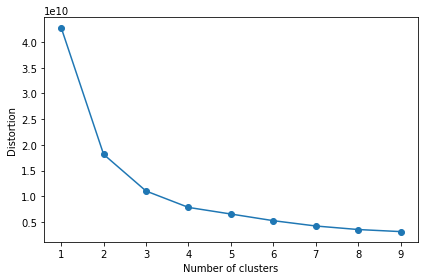

In [12]:
distortions=[]
for i in range(1,10):
    km=KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=1)
    km.fit(df_f_kmens)
    distortions.append(km.inertia_)
plt.plot(range(1,10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()    

c:\Users\shahn.EANTEC\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


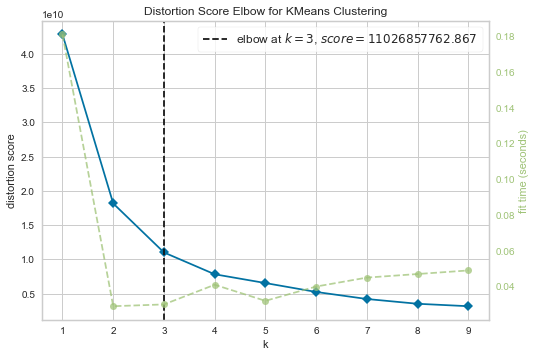

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df_f_kmens)
visualizer.show()

In [14]:
# iris 의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(df_f_kmens, df_kmeans_ed['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
df_kmeans_ed['silhouette_coeff'] = score_samples

silhouette_samples( ) return 값의 shape (291,)


In [15]:
# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(df_f_kmens, df_kmeans_ed['cluster'])
print('지하철 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

지하철 데이터셋 Silhouette Analysis Score:0.450


<AxesSubplot:>

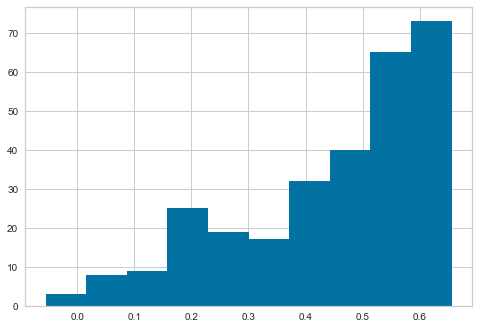

In [16]:
df_kmeans_ed['silhouette_coeff'].hist()

In [17]:
df_kmeans_ed.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.493136
1    0.397921
2    0.405363
Name: silhouette_coeff, dtype: float64

In [18]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

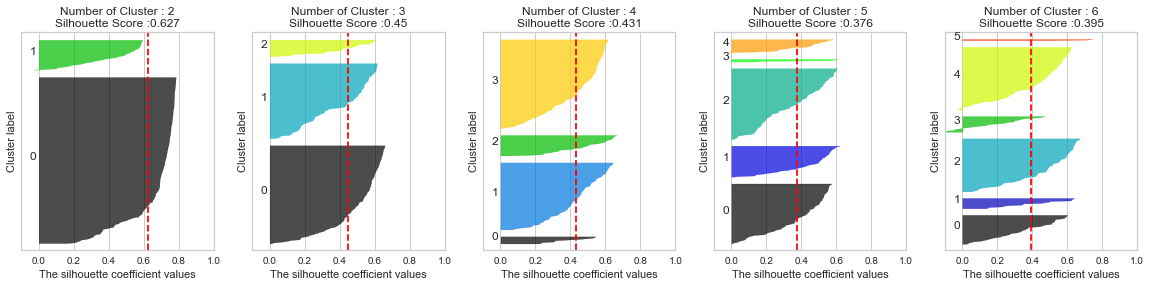

In [19]:
visualize_silhouette([ 2,3, 4, 5,6 ], df_kmeans_ed)

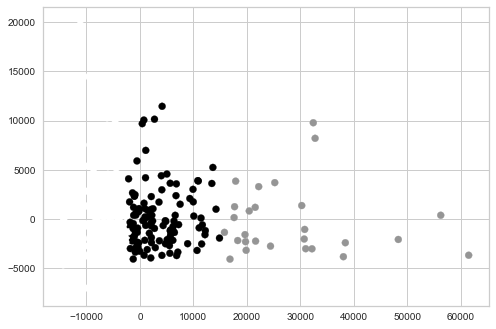

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(df_f_kmens)

df_kmeans_ed['pca_x'] = pca_transformed[:,0]
df_kmeans_ed['pca_y'] = pca_transformed[:,1]
df_kmeans_ed.head(3)

plt.scatter(x=df_kmeans_ed.loc[:, 'pca_x'], y=df_kmeans_ed.loc[:, 'pca_y'], c=df_kmeans_ed['cluster']) 

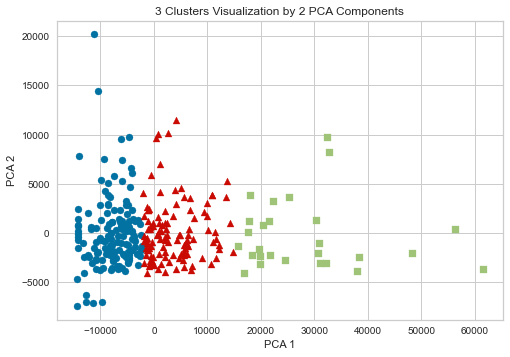

In [21]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = df_kmeans_ed[df_kmeans_ed['cluster']==0].index
marker1_ind = df_kmeans_ed[df_kmeans_ed['cluster']==1].index
marker2_ind = df_kmeans_ed[df_kmeans_ed['cluster']==2].index
# marker3_ind = d_kmeans_ed[df_kmeans_ed['cluster']==3].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=df_kmeans_ed.loc[marker0_ind,'pca_x'], y=df_kmeans_ed.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=df_kmeans_ed.loc[marker1_ind,'pca_x'], y=df_kmeans_ed.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=df_kmeans_ed.loc[marker2_ind,'pca_x'], y=df_kmeans_ed.loc[marker2_ind,'pca_y'], marker='^')
# plt.scatter(x=df_kmeans_ed.loc[marker3_ind,'pca_x'], y=df_kmeans_ed.loc[marker3_ind,'pca_y'], marker='x')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

In [22]:
# https://gaussian37.github.io/ml-concept-t_sne/


from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
x = tsne.fit_transform(df_kmeans_ed)
df_tsne = pd.DataFrame(x)
df_tsne['cluster'] = df_kmeans_ed['cluster']
df_tsne.columns = ['axis_0','axis_1','cluster']
df_tsne.head()

c:\Users\shahn.EANTEC\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\shahn.EANTEC\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,axis_0,axis_1,cluster
0,-0.625091,10.855433,0
1,-9.039388,6.688703,0
2,16.356171,-19.523155,1
3,19.410057,-23.097240,1
4,5.248919,-3.155586,2


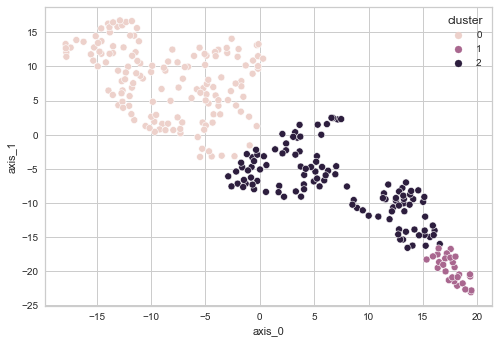

In [23]:
import seaborn as sns
tsne_graph = sns.scatterplot(x='axis_0', y='axis_1', hue='cluster', data=df_tsne)

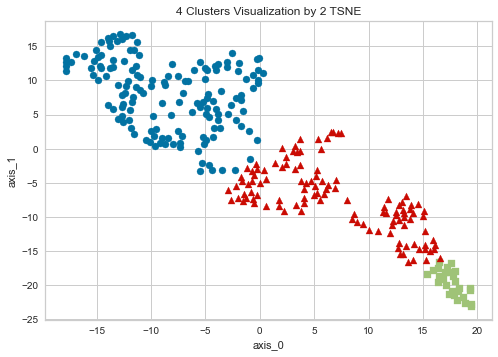

In [24]:
# https://gaussian37.github.io/ml-concept-t_sne/

# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = df_tsne[df_tsne['cluster']==0].index
marker1_ind = df_tsne[df_tsne['cluster']==1].index
marker2_ind = df_tsne[df_tsne['cluster']==2].index
# marker3_ind = df_tsne[df_tsne['cluster']==3].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 axis_0, axis_1 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=df_tsne.loc[marker0_ind,'axis_0'], y=df_tsne.loc[marker0_ind,'axis_1'], marker='o') 
plt.scatter(x=df_tsne.loc[marker1_ind,'axis_0'], y=df_tsne.loc[marker1_ind,'axis_1'], marker='s')
plt.scatter(x=df_tsne.loc[marker2_ind,'axis_0'], y=df_tsne.loc[marker2_ind,'axis_1'], marker='^')
# plt.scatter(x=df_tsne.loc[marker3_ind,'axis_0'], y=df_tsne.loc[marker3_ind,'axis_1'], marker='x')

plt.xlabel('axis_0')
plt.ylabel('axis_1')
plt.title('4 Clusters Visualization by 2 TSNE')
plt.show()

In [25]:
df_kmeans_ed.groupby(['cluster']).count()

,호선,길이(M),층규모,면적(㎡),준공년도,섬식,상대식,복합식,지상,지상+지하(복합),지하,환승유무,사용인원(22.05)_승하차/평균,임대상가면적,silhouette_coeff,pca_x,pca_y
cluster,,,,,,,,,,,,,,,,,
0,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149
1,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
2,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115


In [26]:
tempo_clip = df_kmeans_ed.groupby(['cluster','준공년도']).agg(['mean','sum','count','median'])
tempo_clip.to_clipboard()
tempo_clip

호선                         길이(M)                     \
                  mean  sum count median        mean   sum count median   
cluster 준공년도                                                              
0       1974  1.000000    1     1    1.0  210.000000   210     1  210.0   
        1980  2.000000    6     3    2.0  155.000000   465     3  130.0   
        1983  2.000000    2     1    2.0  205.000000   205     1  205.0   
        1984  2.000000    4     2    2.0  205.000000   410     2  205.0   
        1985  3.214286   45    14    3.0  205.000000  2870    14  205.0   
        1990  3.000000    3     1    3.0  205.000000   205     1  205.0   
        1992  2.000000    4     2    2.0  165.000000   330     2  165.0   
        1993  3.142857   22     7    3.0  205.000000  1435     7  205.0   
        1994  4.000000    4     1    4.0  205.000000   205     1  205.0   
        1995  5.000000   25     5    5.0  165.000000   825     5  165.0   
        1996  5.575758  184    33    5.0  162.575758  5365    33  165.0   
        1997  6.916667   83    12    8.0  141.666667  1700    12  125.0   
        1999  8.000000   16     2    8.0  125.000000   250     2  125.0   
        2000  6.727273   74    11    7.0  165.000000  1815    11  165.0   
        2001  6.037037  163    27    6.0  165.000000  4455    27  165.0   
        2005  1.500000    3     2    1.5  150.000000   300     2  150.0   
        2010  3.000000    9     3    3.0  205.000000   615     3  205.0   
        2012  7.000000   63     9    7.0  165.000000  1485     9  165.0   
        2015  9.000000   36     4    9.0  165.000000   660     4  165.0   
        2018  9.000000   72     8    9.0  165.000000  1320     8  165.0   
        2019  6.000000    6     1    6.0  165.000000   165     1  165.0   
1       1974  1.000000    2     2    1.0  210.000000   420     2  210.0   
        1980  2.000000    8     4    2.0  205.000000   820     4  205.0   
        1982  2.000000   10     5    2.0  205.000000  1025     5  205.0   
        1983  2.000000    6     3    2.0  205.000000   615     3  205.0   
        1984  2.000000   12     6    2.0  205.000000  1230     6  205.0   
        1985  3.333333   20     6    3.0  205.000000  1230     6  205.0   
        2000  7.000000    7     1    7.0  165.000000   165     1  165.0   
2       1974  1.000000    6     6    1.0  210.000000  1260     6  210.0   
        1980  2.000000    8     4    2.0  205.000000   820     4  205.0   
        1983  2.000000   20    10    2.0  205.000000  2050    10  205.0   
        1984  2.000000   16     8    2.0  205.000000  1640     8  205.0   
        1985  3.703704  100    27    4.0  205.000000  5535    27  205.0   
        1993  3.000000    3     1    3.0  205.000000   205     1  205.0   
        1995  5.000000   35     7    5.0  165.000000  1155     7  165.0   
        1996  5.923077   77    13    5.0  165.000000  2145    13  165.0   
        1997  6.428571   90    14    7.0  153.571429  2150    14  165.0   
        1999  8.000000   16     2    8.0  125.000000   250     2  125.0   
        2000  7.000000   49     7    7.0  165.000000  1155     7  165.0   
        2001  6.428571   90    14    6.0  165.000000  2310    14  165.0   
        2002  6.000000    6     1    6.0  165.000000   165     1  165.0   
        2015  9.000000    9     1    9.0  165.000000   165     1  165.0   

                   층규모       ... silhouette_coeff                   pca_x  \
                  mean  sum  ...            count    median          mean   
cluster 준공년도                 ...                                            
0       1974  2.000000    2  ...                1  0.161536  -3008.249351   
        1980  1.666667    5  ...                3  0.505075 -11716.931153   
        1983  2.000000    2  ...                1  0.164552  -2938.620418   
        1984  2.500000    5  ...                2  0.456836  -4884.257184   
        1985  2.857143   40  ...               14  0.508643  -7092.512496   
        1990  2.000000    2 

# Mean shift

In [27]:
from sklearn.cluster import MeanShift


# GMM
**GaussianMixture

In [28]:
from sklearn.mixture import GaussianMixture
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(df_f_kmens)
gmm_cluster_labels = gmm.predict(df_f_kmens)

# 클러스터링 결과를 df_kmeans_ed 의 'gmm_cluster' 컬럼명으로 저장
df_kmeans_ed['gmm_cluster'] = gmm_cluster_labels


In [29]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

c:\Users\shahn.EANTEC\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\shahn.EANTEC\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


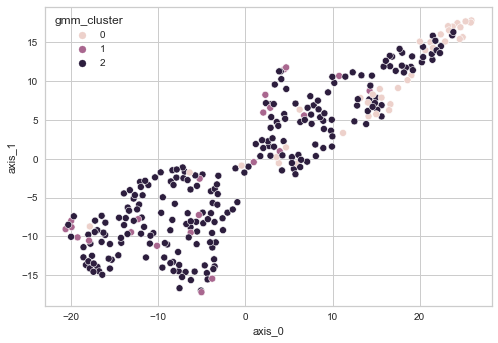

In [30]:
# https://gaussian37.github.io/ml-concept-t_sne/


from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
x = tsne.fit_transform(df_f_kmens)
df_tsne = pd.DataFrame(x)
df_tsne['gmm_cluster'] = df_kmeans_ed['gmm_cluster']
df_tsne.columns = ['axis_0','axis_1','gmm_cluster']
df_tsne.head()


import seaborn as sns
tsne_graph = sns.scatterplot(x='axis_0', y='axis_1', hue='gmm_cluster', data=df_tsne)


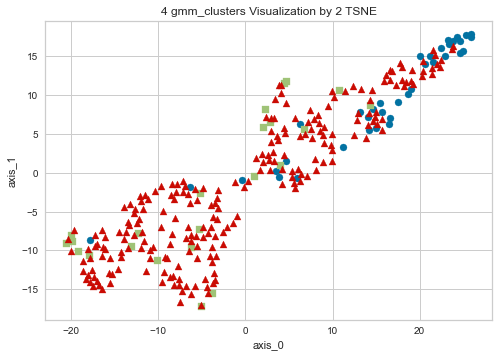

In [31]:
# https://gaussian37.github.io/ml-concept-t_sne/

# gmm_cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = df_tsne[df_tsne['gmm_cluster']==0].index
marker1_ind = df_tsne[df_tsne['gmm_cluster']==1].index
marker2_ind = df_tsne[df_tsne['gmm_cluster']==2].index
# marker3_ind = df_tsne[df_tsne['gmm_cluster']==3].index

# gmm_cluster값 0, 1, 2에 해당하는 Index로 각 gmm_cluster 레벨의 axis_0, axis_1 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=df_tsne.loc[marker0_ind,'axis_0'], y=df_tsne.loc[marker0_ind,'axis_1'], marker='o') 
plt.scatter(x=df_tsne.loc[marker1_ind,'axis_0'], y=df_tsne.loc[marker1_ind,'axis_1'], marker='s')
plt.scatter(x=df_tsne.loc[marker2_ind,'axis_0'], y=df_tsne.loc[marker2_ind,'axis_1'], marker='^')
# plt.scatter(x=df_tsne.loc[marker3_ind,'axis_0'], y=df_tsne.loc[marker3_ind,'axis_1'], marker='x')

plt.xlabel('axis_0')
plt.ylabel('axis_1')
plt.title('4 gmm_clusters Visualization by 2 TSNE')
plt.show()

In [32]:
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

NameError: name 'clusterDF' is not defined

In [ ]:
tempo_clip = df_kmeans_ed.groupby(['gmm_cluster','준공년도']).agg(['mean','sum','count','median'])
tempo_clip.to_clipboard()
tempo_clip

호선                         길이(M)                     \
                      mean  sum count median        mean   sum count median   
gmm_cluster 준공년도                                                              
0           1980  2.000000   12     6    2.0  205.000000  1230     6  205.0   
            1982  2.000000    8     4    2.0  205.000000   820     4  205.0   
            1983  2.000000   24    12    2.0  205.000000  2460    12  205.0   
            1984  2.000000   28    14    2.0  205.000000  2870    14  205.0   
            1985  3.000000    3     1    3.0  205.000000   205     1  205.0   
1           1980  2.000000    4     2    2.0  130.000000   260     2  130.0   
            1992  2.000000    2     1    2.0  165.000000   165     1  165.0   
            1993  3.000000    6     2    3.0  205.000000   410     2  205.0   
            1995  5.000000   10     2    5.0  165.000000   330     2  165.0   
            1996  5.666667   17     3    5.0  165.000000   495     3  165.0   
            1997  7.000000    7     1    7.0  165.000000   165     1  165.0   
            2000  6.666667   20     3    7.0  165.000000   495     3  165.0   
            2001  6.250000   25     4    6.0  165.000000   660     4  165.0   
            2002  6.000000    6     1    6.0  165.000000   165     1  165.0   
            2005  1.500000    3     2    1.5  150.000000   300     2  150.0   
            2018  9.000000    9     1    9.0  165.000000   165     1  165.0   
            2019  6.000000    6     1    6.0  165.000000   165     1  165.0   
2           1974  1.000000    9     9    1.0  210.000000  1890     9  210.0   
            1980  2.000000    6     3    2.0  205.000000   615     3  205.0   
            1982  2.000000    2     1    2.0  205.000000   205     1  205.0   
            1983  2.000000    4     2    2.0  205.000000   410     2  205.0   
            1984  2.000000    4     2    2.0  205.000000   410     2  205.0   
            1985  3.521739  162    46    4.0  205.000000  9430    46  205.0   
            1990  3.000000    3     1    3.0  205.000000   205     1  205.0   
            1992  2.000000    2     1    2.0  165.000000   165     1  165.0   
            1993  3.166667   19     6    3.0  205.000000  1230     6  205.0   
            1994  4.000000    4     1    4.0  205.000000   205     1  205.0   
            1995  5.000000   50    10    5.0  165.000000  1650    10  165.0   
            1996  5.674419  244    43    5.0  163.139535  7015    43  165.0   
            1997  6.640000  166    25    7.0  147.400000  3685    25  165.0   
            1999  8.000000   32     4    8.0  125.000000   500     4  125.0   
            2000  6.875000  110    16    7.0  165.000000  2640    16  165.0   
            2001  6.162162  228    37    6.0  165.000000  6105    37  165.0   
            2010  3.000000    9     3    3.0  205.000000   615     3  205.0   
            2012  7.000000   63     9    7.0  165.000000  1485     9  165.0   
            2015  9.000000   45     5    9.0  165.000000   825     5  165.0   
            2018  9.000000   63     7    9.0  165.000000  1155     7  165.0   

                       층규모       ... silhouette_coeff                   pca_x  \
                      mean  sum  ...            count    median          mean   
gmm_cluster 준공년도                 ...                                            
0           1980  2.500000   15  ...                6  0.537456  17288.548714   
            1982  2.000000    8  ...                4  0.494135  35489.026307   
            1983  2.083333   25  ...               12  0.479578   6953.877232   
            1984  2.285714   32  ...               14  0.531000  16571.396447   
            1985  3.000000    3  ...                1  0.470261  32753.092561   
1           1980  1.500000    3  ...                2  0.493176 -12122.446813   
            1992  5.000000    5  ...                1  0.561410 -13127.212792   
            1993  4.000000    8  ...                2

In [33]:
df_kmeans_ed.info

<bound method DataFrame.info of      호선  길이(M)  층규모    면적(㎡)  준공년도  섬식  상대식  복합식  지상  지상+지하(복합)  지하  환승유무  \
0     3    205    4  16066.0  2010   0    1    0   0          0   1     1   
1     8    125    2   7728.1  1996   0    1    0   0          0   1     1   
2     7    165    4  12551.5  2000   0    1    0   0          0   1     1   
3     2    205    2   6392.0  1982   0    1    0   0          0   1     1   
4     7    165    3  10359.3  2001   0    1    0   0          0   1     1   
..   ..    ...  ...      ...   ...  ..  ...  ...  ..        ...  ..   ...   
286   3    205    3   9825.0  1985   1    0    0   0          0   1     0   
287   5    165    2   9127.7  1996   1    0    0   0          0   1     0   
288   6    165    2  10107.2  2000   0    1    0   0          0   1     0   
289   4    205    4  12024.8  1985   1    0    0   0          0   1     0   
290   6    165    3   6793.8  2001   1    0    0   0          0   1     1   

     사용인원(22.05)_승하차/평균   임대상가면적  cluster  

In [36]:
tempo_clip = df_kmeans_ed.groupby(['gmm_cluster','지상','지상+지하(복합)','지하']).agg(['mean','sum','count','median'])
tempo_clip.to_clipboard()
tempo_clip

호선                          길이(M)         \
                                 mean   sum count median        mean    sum   
gmm_cluster 지상 지상+지하(복합) 지하                                                   
0           0  0         1   2.034483    59    29    2.0  205.000000   5945   
            1  0         0   2.000000    16     8    2.0  205.000000   1640   
1           0  0         1   5.769231    75    13    6.0  162.307692   2110   
               1         0   4.500000    36     8    5.5  175.625000   1405   
            1  0         0   2.000000     4     2    2.0  130.000000    260   
2           0  0         1   5.376147  1172   218    5.0  173.830275  37895   
            1  0         0   4.076923    53    13    4.0  195.769231   2545   

                                               층규모       ... silhouette_coeff  \
                            count median      mean  sum  ...            count   
gmm_cluster 지상 지상+지하(복합) 지하                              ...                    
0           0  0         1     29  205.0  2.034483   59  ...               29   
            1  0         0      8  205.0  3.000000   24  ...                8   
1           0  0         1     13  165.0  2.461538   32  ...               13   
               1         0      8  165.0  4.500000   36  ...                8   
            1  0         0      2  130.0  1.500000    3  ...                2   
2           0  0         1    218  165.0  3.000000  654  ...              218   
            1  0         0     13  205.0  2.615385   34  ...               13   

                                              pca_x                       \
                               median          mean            sum count   
gmm_cluster 지상 지상+지하(복합) 지하                                                
0           0  0         1   0.481425  16286.749145  472315.725209    29   
            1  0         0   0.561166  15196.355237  121570.841899     8   
1           0  0         1   0.469649  -2776.680669  -36096.848702    13   
               1         0   0.428280  -6284.167125  -50273.337004     8   
            1  0         0   0.493176 -12122.446813  -24244.893627     2   
2           0  0         1   0.515748  -2140.377165 -466602.222025   218   
            1  0         0   0.470796  -1282.251212  -16669.265751    13   

                                                 pca_y                      \
                                   median         mean           sum count   
gmm_cluster 지상 지상+지하(복합) 지하                                                  
0           0  0         1    6861.600289  -768.570321 -22288.539296    29   
            1  0         0    9795.966043 -2231.260590 -17850.084724     8   
1           0  0         1   -2491.923733  2189.055625  28457.723129    13   
               1         0   -6723.266933  2156.139738  17249.117901     8   
            1  0         0  -12122.446813 -6730.809583 -13461.619166     2   
2           0  0         1   -4135.142134   172.540120  37613.746221   218   
            1  0         0   -1798.840191 -2286.180313 -29720.344065    13   

                                          
                                  median  
gmm_cluster 지상 지상+지하(복합) 지하               
0           0  0         1  -2025.944461  
            1  0         0  -2625.759977  
1           0  0         1    261.045634  
               1         0    776.430250  
            1  0         0  -6730.809583  
2           0  0         1   -333.187805  
            1  0         0  -2275.173113  

[7 rows x 60 columns]

In [37]:
tempo_clip = df_kmeans_ed.groupby(['gmm_cluster',]).agg(['mean','sum','count','median'])
tempo_clip.to_clipboard()
tempo_clip

호선                          길이(M)                      \
                 mean   sum count median        mean    sum count median   
gmm_cluster                                                                
0            2.027027    75    37    2.0  205.000000   7585    37  205.0   
1            5.000000   115    23    6.0  164.130435   3775    23  165.0   
2            5.303030  1225   231    5.0  175.064935  40440   231  165.0   

                  층규모       ... silhouette_coeff                   pca_x  \
                 mean  sum  ...            count    median          mean   
gmm_cluster                 ...                                            
0            2.243243   83  ...               37  0.506274  16050.988300   
1            3.086957   71  ...               23  0.469649  -4809.351275   
2            2.978355  688  ...              231  0.503936  -2092.084363   

                                                     pca_y                \
                       sum count       median         mean           sum   
gmm_cluster                                                                
0            593886.567108    37  8914.490223 -1084.827676 -40138.624020   
1           -110615.079332    23 -4637.919112  1401.966168  32245.221864   
2           -483271.487776   231 -4089.971873    34.170572   7893.402156   

                                
            count       median  
gmm_cluster                     
0              37 -2109.332167  
1              23   213.679750  
2             231  -464.816468  

[3 rows x 72 columns]

In [38]:
tempo_clip = df_kmeans_ed
tempo_clip.to_clipboard()
tempo_clip

,호선,길이(M),층규모,면적(㎡),준공년도,섬식,상대식,복합식,지상,지상+지하(복합),지하,환승유무,사용인원(22.05)_승하차/평균,임대상가면적,cluster,silhouette_coeff,pca_x,pca_y,gmm_cluster
0,3,205,4,16066.0,2010,0,1,0,0,0,1,1,8201.290320,21.00,0,0.302181,-5912.836965,7376.340668,2
1,8,125,2,7728.1,1996,0,1,0,0,0,1,1,7367.338710,160.05,0,0.611170,-6913.039452,-922.450969,2
2,7,165,4,12551.5,2000,0,1,0,0,0,1,1,36395.758060,212.48,1,0.424376,22205.502630,3294.577217,2
3,2,205,2,6392.0,1982,0,1,0,0,0,1,1,75795.661290,183.22,1,0.399330,61470.750950,-3671.712344,0
4,7,165,3,10359.3,2001,0,1,0,0,0,1,1,14980.532260,1320.00,2,0.420035,763.790217,1610.058946,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,3,205,3,9825.0,1985,1,0,0,0,0,1,0,16670.725810,1440.96,2,0.534370,2444.140567,1048.294680,2
287,5,165,2,9127.7,1996,1,0,0,0,0,1,0,25676.241940,298.14,2,0.480497,11420.783435,103.250123,2
288,6,165,2,10107.2,2000,0,1,0,0,0,1,0,10237.919350,239.60,0,0.332843,-3994.400003,1397.507226,2
289,4,205,4,12024.8,1985,1,0,0,0,0,1,0,24119.322580,132.00,2,0.540152,9920.852148,3018.548475,2
